In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("water.csv")
#df.info()
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
# Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
"""
Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
"""

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

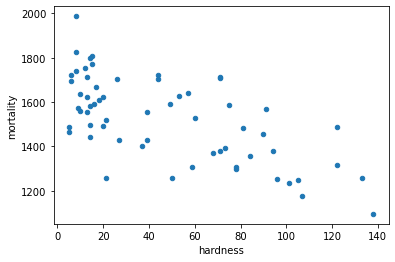

In [3]:
# Построить точечный график. Пока на данном графике наблюдается обратная зависимость
df.plot(kind = "scatter", x = "hardness", y ="mortality" )

In [4]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
df[["hardness", "mortality"]].corr()


,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
df[["hardness", "mortality"]].corr(method = "spearman")

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [17]:
#df[["hardness", "mortality"]].corr(method = "kendall")

In [6]:
# Построить модель линейной регрессии

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df[["hardness"]]
y = df[["mortality"]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [10]:
#X_train.shape
y_train.shape

(42, 1)

In [11]:
# Обучаем модель на тестовых данных
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_ #определяем коэф а

array([[-3.13167087]])

In [13]:
model.intercept_ #определяем независимый член b

array([1668.97229773])

In [14]:
# делаем прогноз
y_pred = model.predict(X_test)
y_pred

array([[1340.14685615],
       [1637.65558901],
       [1625.12890552],
       [1531.17877935],
       [1424.7019697 ],
       [1606.33888028],
       [1252.46007173],
       [1434.09698232],
       [1603.20720941],
       [1650.18227249],
       [1484.20371627],
       [1415.30695708],
       [1546.83713371],
       [1625.12890552],
       [1446.62366581],
       [1546.83713371],
       [1637.65558901],
       [1621.99723465],
       [1352.67353964]])

In [15]:
#Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

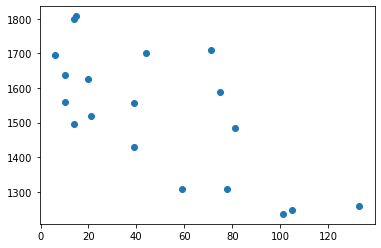

In [16]:
# Выводим график
plt.scatter(X_test, y_test)


In [ ]:
"""
Итог: Есть обратная связь между смертностью и жесткостю воды. Связь умеренная
"""

In [ ]:
# Задание.
#Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [17]:
df_North = df.loc[df["location"] == "North"]
df_North.head(2)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

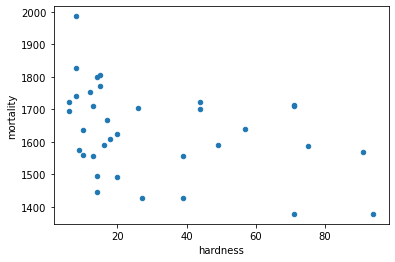

In [18]:
df_North.plot(kind = "scatter", x = "hardness", y ="mortality" )

In [19]:
df_North[["hardness", "mortality"]].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [20]:
df_North[["hardness", "mortality"]].corr(method = "spearman")

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [21]:
X_North = df_North[["hardness"]]
y_North = df_North[["mortality"]]

In [22]:
X_North_train, X_North_test, y_North_train, y_North_test = train_test_split(X_North, y_North, test_size = 0.50, random_state = 42)

In [23]:
y_North_train.shape

(17, 1)

In [24]:
model_North = LinearRegression()
model_North.fit(X_North_train, y_North_train)

LinearRegression()

In [25]:
model_North.coef_

array([[-1.14840369]])

In [26]:
model_North.intercept_

array([1659.62147501])

In [57]:
y_pred_North = model.predict(X_North_test)
y_pred_North

array([[1643.91893075],
       [1640.78725988],
       [1625.12890552],
       [1650.18227249],
       [1618.86556377],
       [1446.62366581],
       [1531.17877935],
       [1643.91893075],
       [1546.83713371],
       [1621.99723465],
       [1546.83713371],
       [1606.33888028],
       [1615.7338929 ],
       [1621.99723465],
       [1643.91893075],
       [1625.12890552],
       [1637.65558901],
       [1374.59523575]])

In [27]:
model.score(X_North_test, y_North_test)

0.04384426355951665

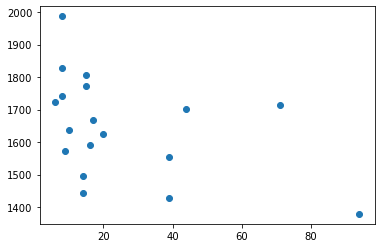

In [28]:
plt.scatter(X_North_test, y_North_test)


In [ ]:
# South

In [29]:
df_South = df.loc[df["location"] == "South"]
df_South.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

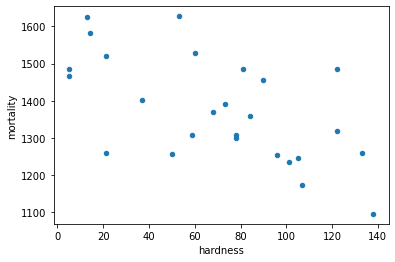

In [30]:
df_South.plot(kind = "scatter", x = "hardness", y ="mortality" )

In [31]:
df_South[["hardness", "mortality"]].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [32]:
df_South[["hardness", "mortality"]].corr(method = "spearman")

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [33]:
X_South = df_South[["hardness"]]
y_South = df_South[["mortality"]]

In [34]:
X_South_train, X_South_test, y_South_train, y_South_test = train_test_split(X_South, y_South, test_size = 0.55, random_state = 42)

In [35]:
model_south = LinearRegression()
model_south.fit(X_South_train, y_South_train)

LinearRegression()

In [36]:
y_South_train.shape

(11, 1)

In [37]:
model_south.coef_

array([[-3.24541089]])

In [38]:
model_south.intercept_

array([1619.80300841])

In [63]:
y_pred_South = model.predict(X_South_test)
y_pred_South

array([[1286.90845133],
       [1653.31394337],
       [1340.14685615],
       [1286.90845133],
       [1553.10047546],
       [1603.20720941],
       [1484.20371627],
       [1653.31394337],
       [1502.9937415 ],
       [1603.20720941],
       [1424.7019697 ],
       [1625.12890552],
       [1333.88351441],
       [1405.91194447],
       [1440.36032406]])

In [39]:
model.score(X_South_test, y_South_test)

-0.48715680562415464

In [ ]:
"""
Итог: Между жесткостью воды и средней годовой смертностью есть обратная связь, умеренная.
Если мы начинаем разбивать по городам, то зависимость остается, но для Южных она увеличивается, становится сильнее, 
а для Северных наоборот становиться слабее. 

"""

Text(0.5, 0.98, 'Остатки Общие')

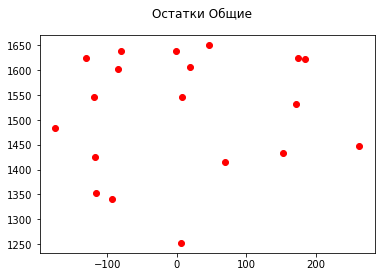

In [62]:
# Остатки общие (как сильно прогноз отличается от факта)
residuals = y_test - y_pred
plt.scatter(residuals, y_pred,  color = "r")
plt.suptitle("Остатки Общие")

In [ ]:
# Остатки North (как сильно прогноз отличается от факта)

Text(0.5, 0.98, 'Остатки North')

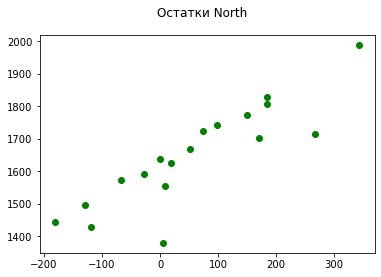

In [61]:
residuals_North = y_North_test - y_pred_North
plt.scatter(residuals_North, y_North_test,  color = "g")
plt.suptitle("Остатки North")

Text(0.5, 0.98, 'Остатки South')

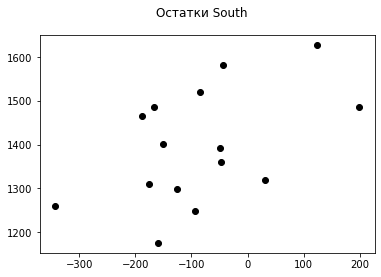

In [68]:
residuals_South = y_South_test - y_pred_South
plt.scatter(residuals_South, y_South_test,  color = "black")
plt.suptitle("Остатки South")